In [152]:
import pandas as pd
import json
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [153]:
instagramFileName = '/Users/amanshah/Documents/Software Projects/Instagram-Analysis/message_1.json'
data_path = "C:/Users/etc.json"
with open(instagramFileName) as file:
    json_data = json.load(file)
    print(json_data)

{'participants': [{'name': 'Sumanth Kumar'}, {'name': 'Dew Bhaumik'}, {'name': 'Aman'}, {'name': 'Lokesh Patel'}, {'name': 'Suhani Trivedi'}, {'name': 'waris.z_'}], 'messages': [{'sender_name': 'Sumanth Kumar', 'timestamp_ms': 1656496133346, 'content': 'itâ\x80\x99s 6am', 'type': 'Generic', 'is_unsent': False, 'is_taken_down': False, 'bumped_message_metadata': {'bumped_message': 'itâ\x80\x99s 6am', 'is_bumped': False}}, {'sender_name': 'Sumanth Kumar', 'timestamp_ms': 1656496127668, 'content': 'why r u awake', 'type': 'Generic', 'is_unsent': False, 'is_taken_down': False, 'bumped_message_metadata': {'bumped_message': 'why r u awake', 'is_bumped': False}}, {'sender_name': 'waris.z_', 'timestamp_ms': 1656495009020, 'content': 'I found Dewâ\x80\x99s girl', 'type': 'Generic', 'is_unsent': False, 'is_taken_down': False, 'bumped_message_metadata': {'bumped_message': 'I found Dewâ\x80\x99s girl', 'is_bumped': False}}, {'sender_name': 'waris.z_', 'timestamp_ms': 1656495008985, 'photos': [{'uri

In [154]:
df = pd.DataFrame(json_data["messages"], columns = ['timestamp_ms', 'sender_name', 'content', 'is_unsent', 'type'])
df.rename(columns={"timestamp_ms": "Time", "sender_name": "Name", "content": "Messages", "is_unsent": "Unsent", "type": "Type"}, inplace=True)
print("len of the dataframe is ",len(df))
df


len of the dataframe is  2056


,Time,Name,Messages,Unsent,Type
0,1656496133346,Sumanth Kumar,itâs 6am,False,Generic
1,1656496127668,Sumanth Kumar,why r u awake,False,Generic
2,1656495009020,waris.z_,I found Dewâs girl,False,Generic
3,1656495008985,waris.z_,NaN,False,Generic
4,1656484488193,waris.z_,waris.z_ sent an attachment.,False,Share
...,...,...,...,...,...
2051,1631655987285,Sumanth Kumar,howâs life,False,Generic
2052,1631655951325,Lokesh Patel,Helllooooo,False,Generic
2053,1631655941155,Sumanth Kumar,hi,False,Generic
2054,1631655805525,Aman,Hey guys,False,Generic


In [155]:
df['Time'] = pd.to_datetime(df['Time'], unit='ms', errors = 'coerce')
for c in df:
    if c == 'Time': 
        df[c] = pd.DatetimeIndex(pd.to_datetime(
            df[c],
            format='%Y-%m-%d %H:%M:%S')).tz_localize(
                'UTC').tz_convert(
                    'US/Eastern')

df['Time'] = df['Time'].apply(lambda x: x.strftime('%Y-%m-%d %I:%M:%S '))

df

,Time,Name,Messages,Unsent,Type
0,2022-06-29 05:48:53,Sumanth Kumar,itâs 6am,False,Generic
1,2022-06-29 05:48:47,Sumanth Kumar,why r u awake,False,Generic
2,2022-06-29 05:30:09,waris.z_,I found Dewâs girl,False,Generic
3,2022-06-29 05:30:08,waris.z_,NaN,False,Generic
4,2022-06-29 02:34:48,waris.z_,waris.z_ sent an attachment.,False,Share
...,...,...,...,...,...
2051,2021-09-14 05:46:27,Sumanth Kumar,howâs life,False,Generic
2052,2021-09-14 05:45:51,Lokesh Patel,Helllooooo,False,Generic
2053,2021-09-14 05:45:41,Sumanth Kumar,hi,False,Generic
2054,2021-09-14 05:43:25,Aman,Hey guys,False,Generic


In [156]:
df = df.replace(['waris.z_'],'Waris')
df = df.replace(['Lokesh Patel'],'Lokesh')
df = df.replace(['Dew Bhaumik'],'Dew')
df = df.replace(['Suhani Trivedi'],'Suhani')
df = df.replace(['Sumanth Kumar'],'Sumanth')

for x in df.index:
    if df.loc[x, 'Type'] == "Share":
        df = df.replace('Share',np.NaN)
    elif df.loc[x, "Unsent"] == "True":
        df = df.replace('True',np.NaN)

df

,Time,Name,Messages,Unsent,Type
0,2022-06-29 05:48:53,Sumanth,itâs 6am,False,Generic
1,2022-06-29 05:48:47,Sumanth,why r u awake,False,Generic
2,2022-06-29 05:30:09,Waris,I found Dewâs girl,False,Generic
3,2022-06-29 05:30:08,Waris,NaN,False,Generic
4,2022-06-29 02:34:48,Waris,waris.z_ sent an attachment.,False,NaN
...,...,...,...,...,...
2051,2021-09-14 05:46:27,Sumanth,howâs life,False,Generic
2052,2021-09-14 05:45:51,Lokesh,Helllooooo,False,Generic
2053,2021-09-14 05:45:41,Sumanth,hi,False,Generic
2054,2021-09-14 05:43:25,Aman,Hey guys,False,Generic


In [157]:
df = df.dropna()
df

,Time,Name,Messages,Unsent,Type
0,2022-06-29 05:48:53,Sumanth,itâs 6am,False,Generic
1,2022-06-29 05:48:47,Sumanth,why r u awake,False,Generic
2,2022-06-29 05:30:09,Waris,I found Dewâs girl,False,Generic
6,2022-06-28 02:15:45,Sumanth,ok and?,False,Generic
7,2022-06-28 02:13:04,Waris,Unavailable,False,Generic
...,...,...,...,...,...
2051,2021-09-14 05:46:27,Sumanth,howâs life,False,Generic
2052,2021-09-14 05:45:51,Lokesh,Helllooooo,False,Generic
2053,2021-09-14 05:45:41,Sumanth,hi,False,Generic
2054,2021-09-14 05:43:25,Aman,Hey guys,False,Generic


In [158]:
authors = ['Sumanth' , 'Waris', 'Aman', 'Lokesh', 'Dew', 'Suhani']
df = df[df['Name'].isin(authors)]
df

,Time,Name,Messages,Unsent,Type
0,2022-06-29 05:48:53,Sumanth,itâs 6am,False,Generic
1,2022-06-29 05:48:47,Sumanth,why r u awake,False,Generic
2,2022-06-29 05:30:09,Waris,I found Dewâs girl,False,Generic
6,2022-06-28 02:15:45,Sumanth,ok and?,False,Generic
7,2022-06-28 02:13:04,Waris,Unavailable,False,Generic
...,...,...,...,...,...
2051,2021-09-14 05:46:27,Sumanth,howâs life,False,Generic
2052,2021-09-14 05:45:51,Lokesh,Helllooooo,False,Generic
2053,2021-09-14 05:45:41,Sumanth,hi,False,Generic
2054,2021-09-14 05:43:25,Aman,Hey guys,False,Generic


In [159]:
df['Number of Words'] = df.Messages.apply(lambda x: len(x.split()))
df['Number of Characters'] = df['Messages'].str.len()
df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
0,2022-06-29 05:48:53,Sumanth,itâs 6am,False,Generic,2,10
1,2022-06-29 05:48:47,Sumanth,why r u awake,False,Generic,4,13
2,2022-06-29 05:30:09,Waris,I found Dewâs girl,False,Generic,4,20
6,2022-06-28 02:15:45,Sumanth,ok and?,False,Generic,2,7
7,2022-06-28 02:13:04,Waris,Unavailable,False,Generic,1,11
...,...,...,...,...,...,...,...
2051,2021-09-14 05:46:27,Sumanth,howâs life,False,Generic,2,12
2052,2021-09-14 05:45:51,Lokesh,Helllooooo,False,Generic,1,10
2053,2021-09-14 05:45:41,Sumanth,hi,False,Generic,1,2
2054,2021-09-14 05:43:25,Aman,Hey guys,False,Generic,2,8


In [160]:
sumanth_df = df.loc[df['Name'] == 'Sumanth']
dew_df = df.loc[df['Name'] == 'Dew']
lokesh_df = df.loc[df['Name'] == 'Lokesh']
suhani_df = df.loc[df['Name'] == 'Suhani']
waris_df = df.loc[df['Name'] == 'Waris']
aman_df = df.loc[df['Name'] == 'Aman']
sumanth_df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
0,2022-06-29 05:48:53,Sumanth,itâs 6am,False,Generic,2,10
1,2022-06-29 05:48:47,Sumanth,why r u awake,False,Generic,4,13
6,2022-06-28 02:15:45,Sumanth,ok and?,False,Generic,2,7
8,2022-06-28 10:07:25,Sumanth,mad jelaous rn,False,Generic,3,14
10,2022-06-27 11:03:32,Sumanth,for aman,False,Generic,2,8
...,...,...,...,...,...,...,...
2045,2021-09-14 05:47:37,Sumanth,ur virus,False,Generic,2,8
2046,2021-09-14 05:47:33,Sumanth,ððð,False,Generic,1,12
2048,2021-09-14 05:47:17,Sumanth,wish i was ranchodas tho,False,Generic,5,24
2051,2021-09-14 05:46:27,Sumanth,howâs life,False,Generic,2,12


In [161]:
dew_df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
12,2022-06-27 12:30:04,Dew,Cock fr,False,Generic,2,7
14,2022-06-27 12:17:39,Dew,Well it wasn't small when it was in me yesterday night,False,Generic,11,54
15,2022-06-27 12:17:29,Dew,Ahhh,False,Generic,1,4
17,2022-06-27 12:16:53,Dew,When u look down can u see ur penis or does ur stomach fat cover it?,False,Generic,16,68
20,2022-06-27 12:16:36,Dew,Like deadass,False,Generic,2,12
...,...,...,...,...,...,...,...
2025,2021-09-14 05:50:50,Dew,Ass,False,Generic,1,3
2028,2021-09-14 05:50:40,Dew,U don't know what that meansð,False,Generic,6,32
2030,2021-09-14 05:49:55,Dew,Urs is bigger,False,Generic,3,13
2032,2021-09-14 05:49:37,Dew,Kem cho maru nam dhagri che,False,Generic,6,27


In [162]:
lokesh_df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
124,2022-06-24 10:27:38,Lokesh,Ur mad coz bad,False,Generic,4,14
128,2022-06-24 10:27:22,Lokesh,Because Iâm the one,False,Generic,4,21
130,2022-06-24 10:27:19,Lokesh,Makes sense tbh,False,Generic,3,15
132,2022-06-24 10:27:09,Lokesh,So hemadri not the one yo,False,Generic,6,25
148,2022-06-24 10:25:21,Lokesh,ðð,False,Generic,1,8
...,...,...,...,...,...,...,...
2041,2021-09-14 05:47:58,Lokesh,#golddiggervibes,False,Generic,1,16
2043,2021-09-14 05:47:48,Lokesh,Iâd take chatur as my husband,False,Generic,6,31
2044,2021-09-14 05:47:41,Lokesh,Fuck chatur balling tho,False,Generic,4,23
2050,2021-09-14 05:46:55,Lokesh,Pretty sad feeling like raju rostogi rn,False,Generic,7,39


In [163]:
suhani_df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
114,2022-06-25 02:53:19,Suhani,itâs litterally just gonna get worse,False,Generic,6,38
115,2022-06-25 02:53:10,Suhani,We saw this coming,False,Generic,4,18
251,2022-06-24 01:24:37,Suhani,its good to do research but donât spread misinformation.,False,Generic,9,58
253,2022-06-24 01:24:09,Suhani,"What this means is that every state can create there own laws. SO YES, Texas can say itâs lega...",False,Generic,89,477
391,2022-06-24 01:06:21,Suhani,You should. This isnt funny. Itâs rly important for everyone to be as informed as possible,False,Generic,16,92
...,...,...,...,...,...,...,...
1983,2021-09-14 05:59:29,Suhani,yea line conversion s,False,Generic,4,21
1984,2021-09-14 05:59:26,Suhani,they skip so many steps,False,Generic,5,23
1986,2021-09-14 05:59:20,Suhani,the conversions are taking me so long to understand,False,Generic,9,51
1988,2021-09-14 05:59:12,Suhani,lmao first lecture,False,Generic,3,18


In [164]:
waris_df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
2,2022-06-29 05:30:09,Waris,I found Dewâs girl,False,Generic,4,20
7,2022-06-28 02:13:04,Waris,Unavailable,False,Generic,1,11
30,2022-06-27 12:15:06,Waris,It was truly a period of time,False,Generic,7,29
32,2022-06-27 12:14:21,Waris,Homie has no other jokes ððð¤£,False,Generic,6,37
33,2022-06-27 12:14:15,Waris,I know im doing good with my roasts when sumanth brings out the height jokes,False,Generic,15,76
...,...,...,...,...,...,...,...
1754,2022-01-18 03:24:56,Waris,OGRE,False,Generic,1,4
1779,2022-01-11 07:11:57,Waris,Wtf,False,Generic,1,3
1794,2021-10-29 12:02:35,Waris,Ya weâre prolly just dumb,False,Generic,5,27
1795,2021-10-29 12:02:30,Waris,Lmao,False,Generic,1,4


In [165]:
aman_df

,Time,Name,Messages,Unsent,Type,Number of Words,Number of Characters
88,2022-06-27 12:03:28,Aman,You went there ð¬,False,Generic,4,19
89,2022-06-27 12:03:17,Aman,Ohhhhh damn,False,Generic,2,11
122,2022-06-24 10:29:10,Aman,Making dosa to punish him every time he says his shitty jokes,False,Generic,12,61
123,2022-06-24 10:28:51,Aman,Fam his mom is gonna lock his marriage with some South Indian girl,False,Generic,13,66
126,2022-06-24 10:27:26,Aman,^^,False,Generic,1,2
...,...,...,...,...,...,...,...
2033,2021-09-14 05:49:25,Aman,Lmao,False,Generic,1,4
2047,2021-09-14 05:47:29,Aman,Nah you are Chatur,False,Generic,4,18
2049,2021-09-14 05:47:06,Aman,Lmao,False,Generic,1,4
2054,2021-09-14 05:43:25,Aman,Hey guys,False,Generic,2,8


In [166]:
import gc
from mpl_toolkits.mplot3d import axes3d
import seaborn  as sns
from sklearn.preprocessing import scale
pal = sns.color_palette()
pd.options.display.max_colwidth = 100

Text(0, 0.5, 'Probability')

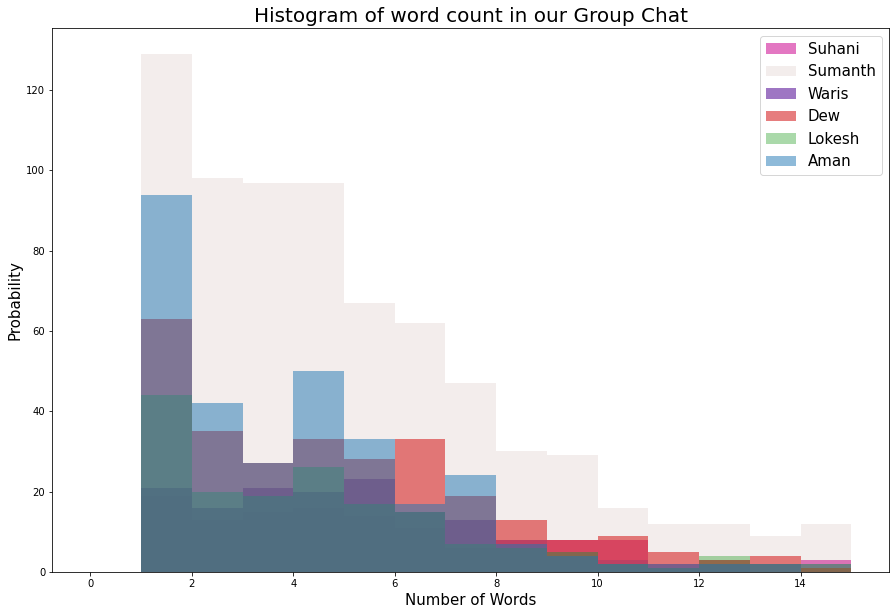

In [167]:
#Suhani vs Sumanth vs Dew vs Aman vs Waris vs Lokesh word count
suhani_msgs = pd.Series(suhani_df['Messages'].tolist()).astype(str)
sumanth_msgs = pd.Series(sumanth_df['Messages'].tolist()).astype(str)
waris_msgs = pd.Series(waris_df['Messages'].tolist()).astype(str)
dew_msgs = pd.Series(dew_df['Messages'].tolist()).astype(str)
lokesh_msgs = pd.Series(lokesh_df['Messages'].tolist()).astype(str)
aman_msgs = pd.Series(aman_df['Messages'].tolist()).astype(str)


dist_suhani = suhani_msgs.apply(lambda x: len(x.split(' ')))
dist_sumanth = sumanth_msgs.apply(lambda x: len(x.split(' ')))
dist_waris = waris_msgs.apply(lambda x: len(x.split(' ')))
dist_dew = dew_msgs.apply(lambda x: len(x.split(' ')))
dist_lokesh = lokesh_msgs.apply(lambda x: len(x.split(' ')))
dist_aman = aman_msgs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))

plt.hist(dist_suhani, bins=15, range=[0, 15], color=pal[6], label='Suhani')
plt.hist(dist_sumanth, bins=15, range=[0, 15], color=pal[5], alpha=0.1, label='Sumanth')
plt.hist(dist_waris, bins=15, range=[0, 15], color=pal[4], alpha=0.9, label='Waris')
plt.hist(dist_dew, bins=15, range=[0, 15], color=pal[3], alpha=0.6, label='Dew')
plt.hist(dist_lokesh, bins=15, range=[0, 15], color=pal[2], alpha=0.4, label='Lokesh')
plt.hist(dist_aman, bins=15, range=[0, 15], color=pal[0], alpha=0.5, label='Aman')

plt.title('Histogram of word count in our Group Chat', fontsize=20)
plt.legend(fontsize = 15)
plt.xlabel('Number of Words', fontsize=15)
plt.ylabel('Probability', fontsize=15)


Text(0, 0.5, 'Probability')

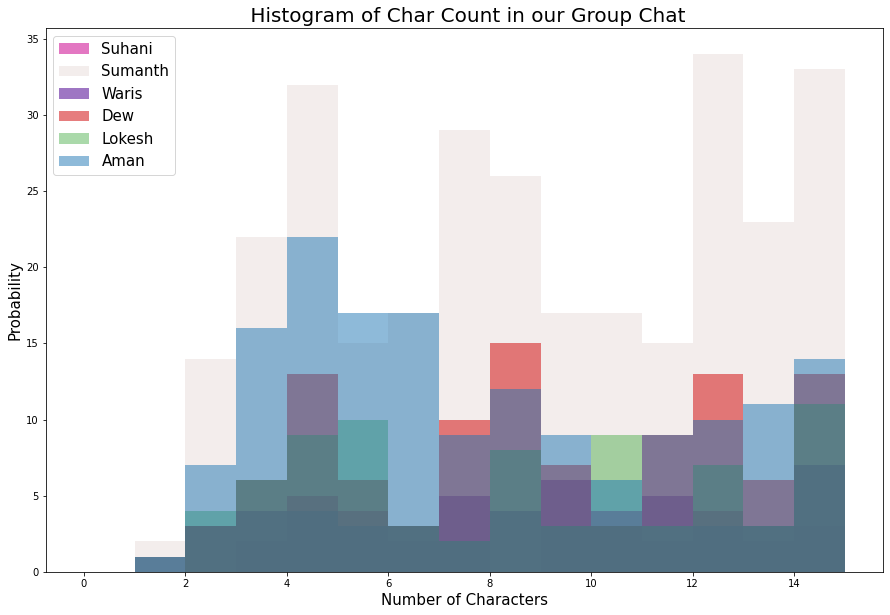

In [168]:
#haely vs haet char count
suhani_msgs = pd.Series(suhani_df['Messages'].tolist()).astype(str)
sumanth_msgs = pd.Series(sumanth_df['Messages'].tolist()).astype(str)
waris_msgs = pd.Series(waris_df['Messages'].tolist()).astype(str)
dew_msgs = pd.Series(dew_df['Messages'].tolist()).astype(str)
lokesh_msgs = pd.Series(lokesh_df['Messages'].tolist()).astype(str)
aman_msgs = pd.Series(aman_df['Messages'].tolist()).astype(str)

dist_suhani = suhani_msgs.apply(len)
dist_sumanth = sumanth_msgs.apply(len)
dist_waris = waris_msgs.apply(len)
dist_dew = dew_msgs.apply(len)
dist_lokesh = lokesh_msgs.apply(len)
dist_aman = aman_msgs.apply(len)

plt.figure(figsize=(15, 10))

plt.hist(dist_suhani, bins=15, range=[0, 15], color=pal[6], label='Suhani')
plt.hist(dist_sumanth, bins=15, range=[0, 15], color=pal[5], alpha=0.1, label='Sumanth')
plt.hist(dist_waris, bins=15, range=[0, 15], color=pal[4], alpha=0.9, label='Waris')
plt.hist(dist_dew, bins=15, range=[0, 15], color=pal[3], alpha=0.6, label='Dew')
plt.hist(dist_lokesh, bins=15, range=[0, 15], color=pal[2], alpha=0.4, label='Lokesh')
plt.hist(dist_aman, bins=15, range=[0, 15], color=pal[0], alpha=0.5, label='Aman')

plt.title(' Histogram of Char Count in our Group Chat', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Number of Characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

<Figure size 432x288 with 0 Axes>

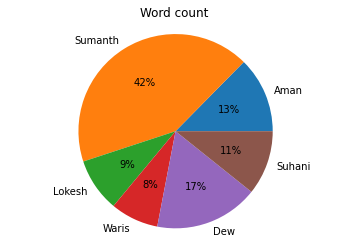

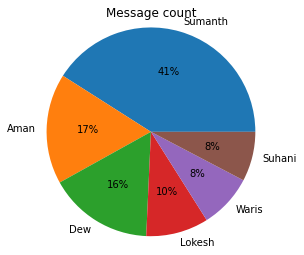

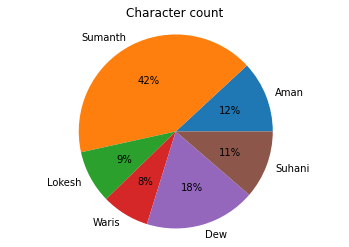

In [169]:
ax = df.Name.value_counts().plot(kind='pie', autopct='%1.0f%%', radius=1.2, title='Message count')
ax.set_ylabel('')

plt.figure(0)
labels = ['Aman', 'Sumanth', 'Lokesh', 'Waris', 'Dew', 'Suhani']
sizes = [aman_df['Number of Words'].sum(), sumanth_df['Number of Words'].sum(), lokesh_df['Number of Words'].sum(), waris_df['Number of Words'].sum(), dew_df['Number of Words'].sum(), suhani_df['Number of Words'].sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Word count')

plt.figure(1)
labels = ['Aman', 'Sumanth', 'Lokesh', 'Waris', 'Dew', 'Suhani']
sizes = [aman_df['Number of Characters'].sum(), sumanth_df['Number of Characters'].sum(), lokesh_df['Number of Characters'].sum(), waris_df['Number of Characters'].sum(), dew_df['Number of Characters'].sum(), suhani_df['Number of Characters'].sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Character count')


plt.show()

In [170]:
# using df_train_vis for all preprcessing
suhani_vis = suhani_df
sumanth_vis = sumanth_df
waris_vis = waris_df
dew_vis = dew_df
lokesh_vis = lokesh_df
aman_vis = aman_df

msgs_suhani = suhani_vis.shape[0]
msgs_sumanth = sumanth_vis.shape[0]
msgs_waris = waris_vis.shape[0]
msgs_dew = dew_vis.shape[0]
msgs_lokesh = lokesh_vis.shape[0]
msgs_aman = aman_vis.shape[0]


print('total msgs by Suhani: ', msgs_suhani)
print('total msgs by Sumanth: ', msgs_sumanth)
print('total msgs by Waris: ', msgs_waris)
print('total msgs by Dew: ', msgs_dew)
print('total msgs by Lokesh: ', msgs_lokesh)
print('total msgs by Aman: ', msgs_aman)

def avg_word_len(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+1))

suhani_vis['Average Word Lenght'] = suhani_vis['Messages'].apply(lambda x: avg_word_len(x))
sumanth_vis['Average Word Lenght'] = sumanth_vis['Messages'].apply(lambda x: avg_word_len(x))
waris_vis['Average Word Lenght'] = waris_vis['Messages'].apply(lambda x: avg_word_len(x))
dew_vis['Average Word Lenght'] = dew_vis['Messages'].apply(lambda x: avg_word_len(x))
lokesh_vis['Average Word Lenght'] = lokesh_vis['Messages'].apply(lambda x: avg_word_len(x))
aman_vis['Average Word Lenght'] = aman_vis['Messages'].apply(lambda x: avg_word_len(x))

aman_vis[['Name', 'Messages','Average Word Lenght']].head()

total msgs by Suhani:  138
total msgs by Sumanth:  736
total msgs by Waris:  150
total msgs by Dew:  291
total msgs by Lokesh:  174
total msgs by Aman:  307


/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/64902465.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suhani_vis['Average Word Lenght'] = suhani_vis['Messages'].apply(lambda x: avg_word_len(x))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/64902465.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumanth_vis['Average Word Lenght'] = sumanth_vis['Messages'].apply(lambda x: avg_word_len(x))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/6490246

,Name,Messages,Average Word Lenght
88,Aman,You went there ð¬,3.200000
89,Aman,Ohhhhh damn,3.333333
122,Aman,Making dosa to punish him every time he says his shitty jokes,3.846154
123,Aman,Fam his mom is gonna lock his marriage with some South Indian girl,3.857143
126,Aman,^^,1.000000


In [171]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amanshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
stop = stopwords.words('english')

aman_vis['Stopwords'] = aman_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
dew_vis['Stopwords'] = dew_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
suhani_vis['Stopwords'] = suhani_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
sumanth_vis['Stopwords'] = sumanth_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
lokesh_vis['Stopwords'] = lokesh_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
waris_vis['Stopwords'] = waris_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))

print(aman_vis[['Messages','Stopwords']].head())

                                                               Messages  \
88                                                  You went there ð¬   
89                                                          Ohhhhh damn   
122       Making dosa to punish him every time he says his shitty jokes   
123  Fam his mom is gonna lock his marriage with some South Indian girl   
126                                                                  ^^   

     Stopwords  
88           1  
89           0  
122          4  
123          5  
126          0  


/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/1573844591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aman_vis['Stopwords'] = aman_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/1573844591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_vis['Stopwords'] = dew_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipy

In [173]:
custom_stop = ['ok', 'hello','haha','tu', 'su','im', 'missed', 'call', 'sticker', 'video', 'missed call', 'video call', 'thing', 'people', 'dont', 'image', 'video', 'omitted', 'che', 'ha', 'aa', 'na', 'chu', 'ne', 'nai']
stop += custom_stop

aman_vis['Stopwords'] = aman_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
dew_vis['Stopwords'] = dew_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
suhani_vis['Stopwords'] = suhani_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
sumanth_vis['Stopwords'] = sumanth_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
lokesh_vis['Stopwords'] = lokesh_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
waris_vis['Stopwords'] = waris_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))

print(aman_vis[['Messages','Stopwords']].head())

/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/2504075329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aman_vis['Stopwords'] = aman_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/2504075329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_vis['Stopwords'] = dew_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipy

                                                               Messages  \
88                                                  You went there ð¬   
89                                                          Ohhhhh damn   
122       Making dosa to punish him every time he says his shitty jokes   
123  Fam his mom is gonna lock his marriage with some South Indian girl   
126                                                                  ^^   

     Stopwords  
88           1  
89           0  
122          4  
123          5  
126          0  


/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/2504075329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumanth_vis['Stopwords'] = sumanth_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/2504075329.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lokesh_vis['Stopwords'] = lokesh_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w

In [174]:
# converting to lowercase
aman_vis['Messages'] = aman_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dew_vis['Messages'] = dew_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
suhani_vis['Messages'] = suhani_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
sumanth_vis['Messages'] = sumanth_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
lokesh_vis['Messages'] = lokesh_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
waris_vis['Messages'] = waris_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#removing punctuation
aman_vis['Messages'] = aman_vis['Messages'].str.replace('[^\w\s]','')
dew_vis['Messages'] = dew_vis['Messages'].str.replace('[^\w\s]','')
suhani_vis['Messages'] = suhani_vis['Messages'].str.replace('[^\w\s]','')
sumanth_vis['Messages'] = sumanth_vis['Messages'].str.replace('[^\w\s]','')
lokesh_vis['Messages'] = lokesh_vis['Messages'].str.replace('[^\w\s]','')
waris_vis['Messages'] = waris_vis['Messages'].str.replace('[^\w\s]','')

aman_vis['Stopwords'] = aman_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
dew_vis['Stopwords'] = dew_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
suhani_vis['Stopwords'] = suhani_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
sumanth_vis['Stopwords'] = sumanth_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
lokesh_vis['Stopwords'] = lokesh_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
waris_vis['Stopwords'] = waris_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))

aman_vis[['Name','Messages','Stopwords']].head()

/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/3452935707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aman_vis['Messages'] = aman_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/3452935707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_vis['Messages'] = dew_vis['Messages'].apply(lambda x: " ".join(x.lower() for x in x.split()))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel

/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/3452935707.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumanth_vis['Stopwords'] = sumanth_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/3452935707.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lokesh_vis['Stopwords'] = lokesh_vis['Messages'].apply(lambda x: len([x for x in x.split() if x in stop]))
/var/folders/j9/blftb2fs1p3d6g1f_hv49j

,Name,Messages,Stopwords
88,Aman,you went there ð,2
89,Aman,ohhhhh damn,0
122,Aman,making dosa to punish him every time he says his shitty jokes,4
123,Aman,fam his mom is gonna lock his marriage with some south indian girl,5
126,Aman,,0


In [175]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

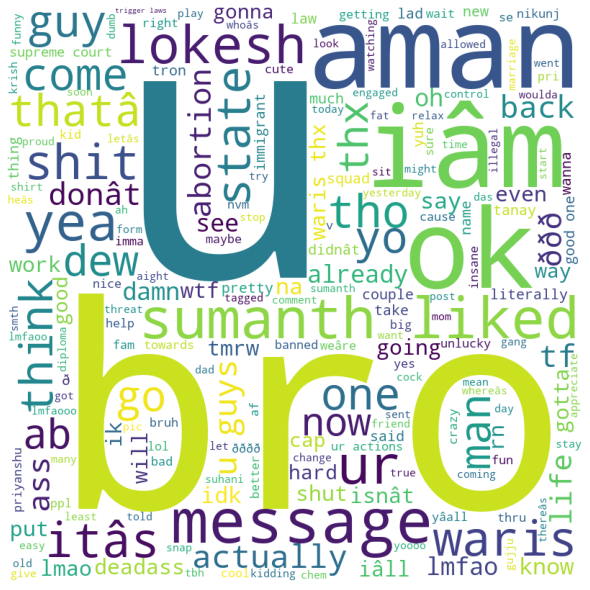

In [178]:
#word cloud for Sumanth
sumanth_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the file 
for val in sumanth_vis['Messages']:
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    for words in tokens: 
        sumanth_words = sumanth_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(sumanth_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

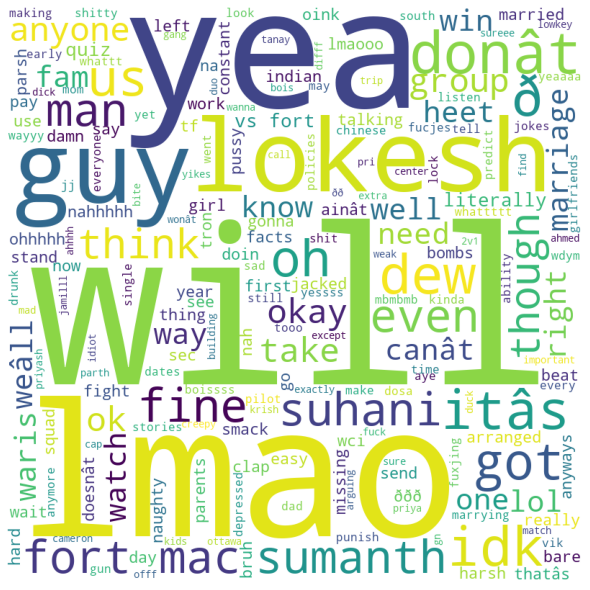

In [179]:
#word cloud for Aman
aman_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the file 
for val in aman_vis['Messages']:
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    for words in tokens: 
        aman_words = aman_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(aman_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

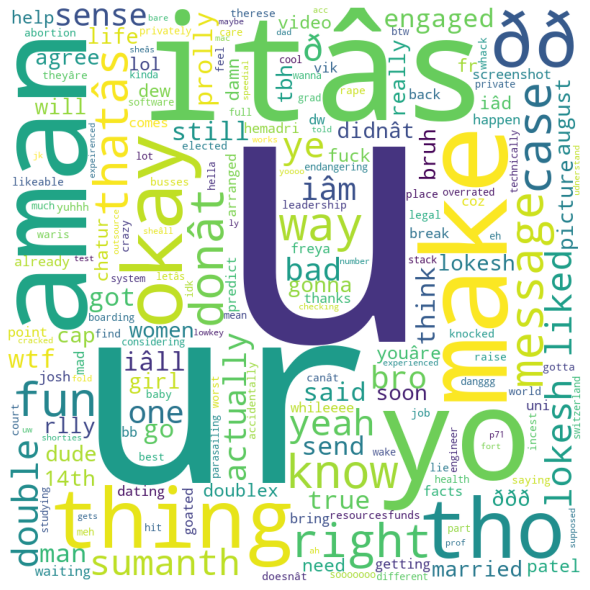

In [180]:
#word cloud for Lokesh
lokesh_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the file 
for val in lokesh_vis['Messages']:
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    for words in tokens: 
        lokesh_words = lokesh_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(lokesh_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

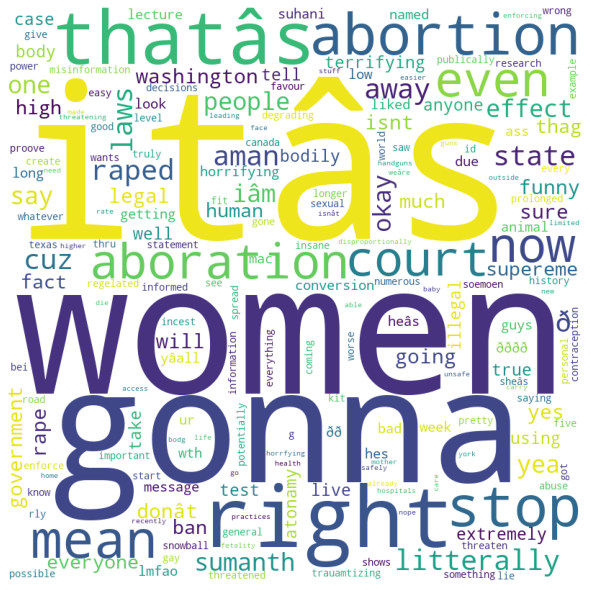

In [181]:
#word cloud for Suhani
suhani_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the file 
for val in suhani_vis['Messages']:
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    for words in tokens: 
        suhani_words = suhani_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(suhani_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

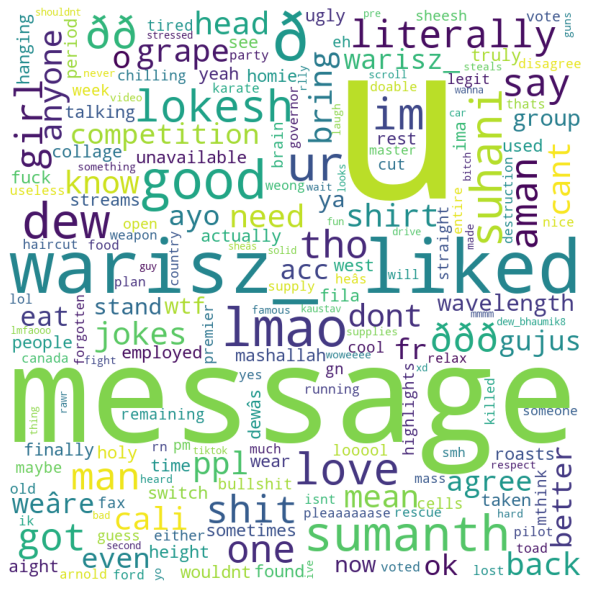

In [183]:
#word cloud for Waris
waris_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the file 
for val in waris_vis['Messages']:
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    for words in tokens: 
        waris_words = waris_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(waris_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [184]:
aman_df.describe()

,Number of Words,Number of Characters,Average Word Lenght,Stopwords
count,307.000000,307.000000,307.000000,307.000000
mean,3.566775,17.078176,3.070211,1.517915
std,2.645369,12.923117,1.380622,1.707970
min,1.000000,1.000000,0.500000,0.000000
25%,1.000000,6.000000,2.309524,0.000000
50%,3.000000,14.000000,3.000000,1.000000
75%,5.000000,24.000000,3.607692,2.500000
max,17.000000,82.000000,12.000000,11.000000


In [185]:
aman_df['Time'] = pd.to_datetime(aman_df['Time'])
dew_df['Time'] = pd.to_datetime(dew_df['Time'])
aman_df.dtypes

/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/1468444937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aman_df['Time'] = pd.to_datetime(aman_df['Time'])
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/1468444937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_df['Time'] = pd.to_datetime(dew_df['Time'])


Time                    datetime64[ns]
Name                            object
Messages                        object
Unsent                            bool
Type                            object
Number of Words                  int64
Number of Characters             int64
Average Word Lenght            float64
Stopwords                        int64
dtype: object

In [186]:
aman_df['time_dif'] = aman_df['Time'].diff()
dew_df['time_dif'] = dew_df['Time'].diff()

/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/1543949731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aman_df['time_dif'] = aman_df['Time'].diff()
/var/folders/j9/blftb2fs1p3d6g1f_hv49j2w0000gp/T/ipykernel_81229/1543949731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dew_df['time_dif'] = dew_df['Time'].diff()


In [187]:
aman_df.describe()

,Number of Words,Number of Characters,Average Word Lenght,Stopwords,time_dif
count,307.000000,307.000000,307.000000,307.000000,306
mean,3.566775,17.078176,3.070211,1.517915,-1 days +01:32:52.009803922
std,2.645369,12.923117,1.380622,1.707970,6 days 00:16:18.048105846
min,1.000000,1.000000,0.500000,0.000000,-91 days +07:47:34
25%,1.000000,6.000000,2.309524,0.000000,-1 days +23:59:14.250000
50%,3.000000,14.000000,3.000000,1.000000,-1 days +23:59:44
75%,5.000000,24.000000,3.607692,2.500000,-1 days +23:59:52
max,17.000000,82.000000,12.000000,11.000000,0 days 11:59:23


In [188]:
aman_df.dtypes

Time                     datetime64[ns]
Name                             object
Messages                         object
Unsent                             bool
Type                             object
Number of Words                   int64
Number of Characters              int64
Average Word Lenght             float64
Stopwords                         int64
time_dif                timedelta64[ns]
dtype: object